# Credit Card Fraud Detection

### Introduction

My objective in this project is to develop a Machine Learning model capable of identifying fraudulent credit card transactions with maximum recall for class 1 (fraudulent), while maintaining satisfactory overall accuracy and precision. The rationale behind this approach is that while we can decline a transaction flagged as fraudulent (even if it is not) and subsequently validate it with the cardholder, we cannot reverse a transaction post-fraudulent activity. Hence, prioritizing high recall for fraudulent transactions is crucial. To achieve this goal, I have opted to employ SVM, Random Forest, and Logistic Regression classifiers.

### Defining the Dataset

I will analyze the 'fraudTrain' and 'fraudTest' datasets obtained from Kaggle, comprising a total of 1,852,394 entries with 22 variables. The dataset consists of 12 object type variables, 6 integer type variables, and 5 float type variables, capturing transactions between 1000 customers and 800 merchants.

Data Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection/data

Column description:

1) Unnamed: Index column.  
2) trans_date_trans_time: Date and time of transaction.    
3) cc_num: Account number.                   
4) merchant: Establishment where transaction occurred.                  
5) category: Category of the establishment.                 
6) amt: Transaction amount.  

Credit Card Owner Information::

7) first: First name.                    
8) last: Last name.                     
9) gender: Gender.                   
10) street: Street address.                   
11) city: City address.                     
12) state: State address.                    
13) zip: Zip code.                      
14) lat: Latitude of the address.                      
15) long: Longitude of the address.                     
16) city_pop: Population of the city.                
17) job: Job occupation.                      
18) dob: Date of birth.

Transaction Information:

19) trans_num: Transaction number.                
20) unix_time: Unix time.                
21) merch_lat: Latitude of the merchant.                
22) merch_long: Longitude of the merchant.               
23) is_fraud: Categorical field indicating whether the transaction is fraudulent. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
# Importing and visualizing datasets.
# Although the dataset is already split into train and test, I chose to concatenate them and then 
# randomly sample the train and test sets afterwards.
df_train = pd.read_csv('fraudTrain.csv')
df_test = pd.read_csv('fraudTest.csv')
df = pd.concat([df_train, df_test])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Checking for null values.
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [4]:
# Checking columns and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [5]:
# Keeping only the columns I am going to use.
df = df.iloc[:,[1,4,5,8,11,22]]
df.head()

,trans_date_trans_time,category,amt,gender,state,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,NC,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,WA,0
2,2019-01-01 00:00:51,entertainment,220.11,M,ID,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,MT,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,VA,0


In [6]:
# Checking number of entries for frauds and not frauds.
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [7]:
# Since the data is highly unbalanced between entries that are fraudulent and non-fraudulent, 
# I am going to use a technique called undersampling, which reduces the number of entries 
# of class "0" to the same amount of entries of class "1", 9651, using a random sample.
df_fraud = df[df.is_fraud == 1]
df_not_fraud = df[df.is_fraud == 0]
print(df_fraud.head())
print(df_not_fraud.head())

     trans_date_trans_time       category     amt gender state  is_fraud
2449   2019-01-02 01:06:37    grocery_pos  281.06      M    NC         1
2472   2019-01-02 01:47:29  gas_transport   11.52      F    TX         1
2523   2019-01-02 03:05:23    grocery_pos  276.31      F    TX         1
2546   2019-01-02 03:38:03  gas_transport    7.03      M    NC         1
2553   2019-01-02 03:55:47    grocery_pos  275.73      F    TX         1
  trans_date_trans_time       category     amt gender state  is_fraud
0   2019-01-01 00:00:18       misc_net    4.97      F    NC         0
1   2019-01-01 00:00:44    grocery_pos  107.23      F    WA         0
2   2019-01-01 00:00:51  entertainment  220.11      M    ID         0
3   2019-01-01 00:01:16  gas_transport   45.00      M    MT         0
4   2019-01-01 00:03:06       misc_pos   41.96      M    VA         0


In [8]:
# Sampling entries from df_not_fraud.
df_not_fraud = df_not_fraud.sample(n=9651, random_state=42)
df_not_fraud

,trans_date_trans_time,category,amt,gender,state,is_fraud
517683,2019-08-11 19:38:33,shopping_pos,50.81,F,WV,0
1012042,2020-02-21 13:31:42,health_fitness,1.97,F,KY,0
581404,2019-09-03 02:39:49,grocery_pos,100.18,M,WY,0
1094893,2020-03-31 02:39:04,shopping_pos,7.67,M,NH,0
433289,2020-12-05 07:58:57,shopping_net,478.10,F,MS,0
...,...,...,...,...,...,...
99709,2019-02-28 10:11:13,gas_transport,62.58,M,SC,0
274694,2020-10-01 08:30:47,misc_net,273.25,M,NY,0
807093,2019-12-06 07:31:26,misc_pos,2.74,F,WI,0
861157,2019-12-17 16:02:43,shopping_net,161.28,M,KY,0


In [9]:
# Concatenating them back together and resetting the indexes.
df = pd.concat([df_not_fraud, df_fraud])
df.reset_index(inplace=True)
df

,index,trans_date_trans_time,category,amt,gender,state,is_fraud
0,517683,2019-08-11 19:38:33,shopping_pos,50.81,F,WV,0
1,1012042,2020-02-21 13:31:42,health_fitness,1.97,F,KY,0
2,581404,2019-09-03 02:39:49,grocery_pos,100.18,M,WY,0
3,1094893,2020-03-31 02:39:04,shopping_pos,7.67,M,NH,0
4,433289,2020-12-05 07:58:57,shopping_net,478.10,F,MS,0
...,...,...,...,...,...,...,...
19297,517197,2020-12-22 22:05:48,shopping_pos,1041.51,M,MS,1
19298,517274,2020-12-22 22:18:07,shopping_pos,868.09,M,MS,1
19299,517341,2020-12-22 22:31:48,shopping_net,1039.42,M,MS,1
19300,517529,2020-12-22 23:06:03,grocery_pos,289.27,M,MS,1


In [10]:
# Checking statistical data for class "Amount".
df['amt'].describe()

count    19302.000000
mean       299.401286
std        375.672619
min          1.000000
25%         20.350000
50%         88.015000
75%        479.595000
max       7508.460000
Name: amt, dtype: float64

amt  
False    19293
True         9
Name: count, dtype: int64

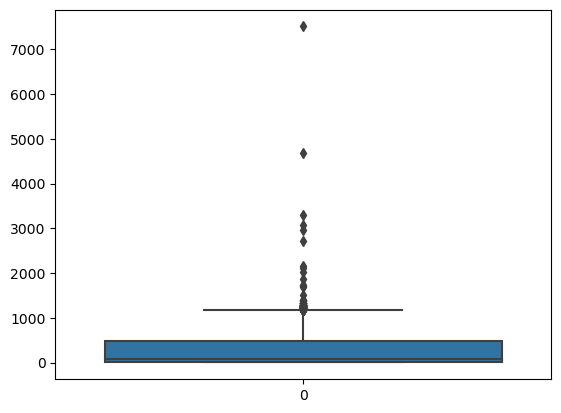

In [11]:
# Checking for outliers.
sns.boxplot(df['amt'])
df.value_counts([df['amt']>2000])

In [12]:
# Looking at outlier entries to check if there is anything unusual.
# I chose to keep them as they do not lead us to a misconclusion, and there seems to be a pattern where 
# higher transaction values tend to be non-fraudulent, which the algorithm can use to build a more precise model.
df.loc[df['amt']>2000]

,index,trans_date_trans_time,category,amt,gender,state,is_fraud
666,239511,2019-04-29 21:41:51,travel,2717.69,F,MO,0
1269,174991,2019-04-01 14:52:07,shopping_pos,2025.15,F,FL,0
1754,1278651,2020-06-14 23:37:02,shopping_net,2162.20,M,FL,0
2600,256126,2020-09-22 20:20:53,travel,4673.39,F,OK,0
2954,593162,2019-09-08 19:31:49,travel,2967.92,F,KS,0
3568,554526,2020-12-31 17:06:52,travel,3304.44,F,WI,0
5369,772600,2019-11-26 17:58:01,shopping_net,7508.46,F,SC,0
8203,694895,2019-10-23 17:09:43,travel,3066.61,F,WA,0
8508,627848,2019-09-23 17:58:35,travel,2105.36,F,MO,0


In [13]:
# Splitting dataset into X and y, the features and the true value for "is_fraud".
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X, y

(         index trans_date_trans_time        category      amt gender state
 0       517683   2019-08-11 19:38:33    shopping_pos    50.81      F    WV
 1      1012042   2020-02-21 13:31:42  health_fitness     1.97      F    KY
 2       581404   2019-09-03 02:39:49     grocery_pos   100.18      M    WY
 3      1094893   2020-03-31 02:39:04    shopping_pos     7.67      M    NH
 4       433289   2020-12-05 07:58:57    shopping_net   478.10      F    MS
 ...        ...                   ...             ...      ...    ...   ...
 19297   517197   2020-12-22 22:05:48    shopping_pos  1041.51      M    MS
 19298   517274   2020-12-22 22:18:07    shopping_pos   868.09      M    MS
 19299   517341   2020-12-22 22:31:48    shopping_net  1039.42      M    MS
 19300   517529   2020-12-22 23:06:03     grocery_pos   289.27      M    MS
 19301   517571   2020-12-22 23:13:39        misc_net   766.38      M    MS
 
 [19302 rows x 6 columns],
 0        0
 1        0
 2        0
 3        0
 4        0

In [14]:
# Transforming date and time column into separate columns
X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
X['week_day'] = X['trans_date_trans_time'].dt.dayofweek  
X['month'] = X['trans_date_trans_time'].dt.month  
X['time'] = X['trans_date_trans_time'].dt.hour  
X.drop(columns=['trans_date_trans_time'], inplace=True)
X.head()

,index,category,amt,gender,state,week_day,month,time
0,517683,shopping_pos,50.81,F,WV,6,8,19
1,1012042,health_fitness,1.97,F,KY,4,2,13
2,581404,grocery_pos,100.18,M,WY,1,9,2
3,1094893,shopping_pos,7.67,M,NH,1,3,2
4,433289,shopping_net,478.10,F,MS,5,12,7


In [15]:
# Creating a column for the time of the day
def time(time):
    if 6 <= time < 12:
        return 'morning'
    elif 12 <= time < 18:
        return 'afternoon'
    elif 18 <= time < 24:
        return 'night'
    else:
        return 'overnight'

X['time_of_day'] = X['time'].apply(time)
X.head()

,index,category,amt,gender,state,week_day,month,time,time_of_day
0,517683,shopping_pos,50.81,F,WV,6,8,19,night
1,1012042,health_fitness,1.97,F,KY,4,2,13,afternoon
2,581404,grocery_pos,100.18,M,WY,1,9,2,overnight
3,1094893,shopping_pos,7.67,M,NH,1,3,2,overnight
4,433289,shopping_net,478.10,F,MS,5,12,7,morning


In [16]:
# Encoding time of day from objects to numbers
time_of_day_mapping = {
    'overnight': 0,
    'morning': 1,
    'afternoon': 2,
    'night': 3
}

# Replacing categories with corresponding numbers using the map function
X["time_of_day"] = X["time_of_day"].map(time_of_day_mapping)
X

,index,category,amt,gender,state,week_day,month,time,time_of_day
0,517683,shopping_pos,50.81,F,WV,6,8,19,3
1,1012042,health_fitness,1.97,F,KY,4,2,13,2
2,581404,grocery_pos,100.18,M,WY,1,9,2,0
3,1094893,shopping_pos,7.67,M,NH,1,3,2,0
4,433289,shopping_net,478.10,F,MS,5,12,7,1
...,...,...,...,...,...,...,...,...,...
19297,517197,shopping_pos,1041.51,M,MS,1,12,22,3
19298,517274,shopping_pos,868.09,M,MS,1,12,22,3
19299,517341,shopping_net,1039.42,M,MS,1,12,22,3
19300,517529,grocery_pos,289.27,M,MS,1,12,23,3


In [17]:
# Encoding columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])
X

,index,category,amt,gender,state,week_day,month,time,time_of_day
0,517683,12,50.81,0,49,6,8,19,3
1,1012042,5,1.97,0,17,4,2,13,2
2,581404,4,100.18,1,50,1,9,2,0
3,1094893,12,7.67,1,30,1,3,2,0
4,433289,11,478.10,0,25,5,12,7,1
...,...,...,...,...,...,...,...,...,...
19297,517197,12,1041.51,1,25,1,12,22,3
19298,517274,12,868.09,1,25,1,12,22,3
19299,517341,11,1039.42,1,25,1,12,22,3
19300,517529,4,289.27,1,25,1,12,23,3


In [18]:
# Checking data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19302 entries, 0 to 19301
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        19302 non-null  int64  
 1   category     19302 non-null  int32  
 2   amt          19302 non-null  float64
 3   gender       19302 non-null  int32  
 4   state        19302 non-null  int32  
 5   week_day     19302 non-null  int32  
 6   month        19302 non-null  int32  
 7   time         19302 non-null  int32  
 8   time_of_day  19302 non-null  int64  
dtypes: float64(1), int32(6), int64(2)
memory usage: 904.9 KB


In [19]:
# Calculating fraud rate for each time of the day.
# The same can be done with all other variables, depending on the focus of the study.
df2 = pd.concat([X, y], axis=1)
fraudulent_transactions = df2[df2['is_fraud'] == 1].groupby('time_of_day').size()
total_transactions = df2.groupby('time_of_day').size()
fraud_rate = (fraudulent_transactions / total_transactions).fillna(0)
print(fraud_rate)

time_of_day
0    0.639057
1    0.158455
2    0.161740
3    0.648524
dtype: float64


In [20]:
# Splitting data into training and test sets.
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
# Implementing the Support Vector Machine algorithm on the training set and checking the results.
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report
SVM = SVC(C=0.1, gamma=0.1, kernel='linear')
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_train)
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7722
           1       0.90      0.74      0.81      7719

    accuracy                           0.83     15441
   macro avg       0.84      0.83      0.83     15441
weighted avg       0.84      0.83      0.83     15441



In [22]:
# Implementing the Support Vector Machine algorithm on the test set and checking the results
y_pred = SVM.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1929
           1       0.89      0.73      0.81      1932

    accuracy                           0.82      3861
   macro avg       0.83      0.82      0.82      3861
weighted avg       0.83      0.82      0.82      3861



In [23]:
# Implementing the Random Forest algorithm on the training set and checking the results
# Results strongly suggest overfitting
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_train)
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7722
           1       1.00      1.00      1.00      7719

    accuracy                           1.00     15441
   macro avg       1.00      1.00      1.00     15441
weighted avg       1.00      1.00      1.00     15441



In [24]:
# Implementing the Random Forest algorithm on the test set and checking the results
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1929
           1       0.98      0.97      0.97      1932

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



In [25]:
# Implementing k-fold cross-validation to check for overfitting
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X_train, y_train, cv=kf)
print("Accuracy scores for each fold:", cv_scores)

Accuracy scores for each fold: [0.97734628 0.96567358 0.97150259 0.97215026 0.96826425 0.96373057
 0.96761658 0.9734456  0.96761658 0.96373057]


In [26]:
# Computing the mean and standard deviation of the accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)

Mean Accuracy: 0.969107684826534
Standard Deviation of Accuracy: 0.004200746777738285


In [27]:
# Implementing the Logistic Regression algorithm on the training set and checking the results
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      7722
           1       0.92      0.75      0.82      7719

    accuracy                           0.84     15441
   macro avg       0.85      0.84      0.84     15441
weighted avg       0.85      0.84      0.84     15441



In [28]:
# Implementing the Logistic Regression algorithm on the test set and checking the results
y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1929
           1       0.92      0.74      0.82      1932

    accuracy                           0.83      3861
   macro avg       0.85      0.83      0.83      3861
weighted avg       0.85      0.83      0.83      3861



# Conclusion

1. The initial steps of data preprocessing involved handling null values, outliers, and unnecessary columns, followed by encoding object type variables and splitting the 'trans_date_trans_time' column into four separate columns.

2. Breaking down the date and time into separate components offers more granular features for the model, as demonstrated by the calculation of fraud rates per day of the week.

3. Further exploration can delve into specific variables, such as identifying states with higher incidences of credit card fraud or determining the days of the week with elevated fraudulent activity.

4. After evaluating three classifiers, Random Forest emerged as the best performer, although it exhibited signs of overfitting. To address this, k-fold cross-validation was employed, resulting in a mean accuracy of 96.91% and a standard deviation of accuracy of 0.004. These results validated the efficacy of the Random Forest Classifier on unseen data.

5. While overall performance metrics were satisfactory, the primary focus was on maximizing recall for fraudulent entries to minimize the risk of undetected fraudulent activity, which was achieved with a value of 97% on the test set. 

6. From a business perspective, additional practices such as setting transaction thresholds and considering various transaction attributes are essential for optimizing fraud detection while minimizing false positives. These measures include evaluating transaction amounts, comparing transaction locations to historical patterns, and monitoring transaction frequency and merchant categories.

7. An example of this would involve denying transactions exceeding a specific amount, categorizing customers into income-based groups or historical spending patterns. Alternatively, one could compare transaction amounts to each customer's median transaction value over the past six months and establish a threshold, such as twice the median value, for instance.

8. It is important to recognize that machine learning algorithms serve as valuable tools in aiding business decisions but require supplementary considerations and human expertise to make informed judgments.